In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
project_root_dir = "."
chapter_id = "end_to_end_project"
images_path = os.path.join(project_root_dir,"images",chapter_id)
os.makedirs(images_path,exist_ok=True)

In [4]:
""" The tight_layout() function in pyplot module of matplotlib library is used 
    to automatically adjust subplot parameters to give specified padding. """
def save_fig(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path = os.path.join(images_path,fig_id+"."+fig_extension)
    print("Saving figure.. ",fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path,format=fig_extension,dpi=resolution)

In [5]:
import tarfile
import urllib.request

In [6]:
root_download = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path = os.path.join("datasets", "housing")
housing_url = root_download + "datasets/housing/housing.tgz"

In [7]:
def fetch_housing_data(housing_url,housing_path):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [8]:
fetch_housing_data(housing_url,housing_path)

In [9]:
def loading_data(housing_path=housing_path):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [10]:
housing=loading_data()

In [11]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [12]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [14]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

Saving figure..  attribute_histogram_plots


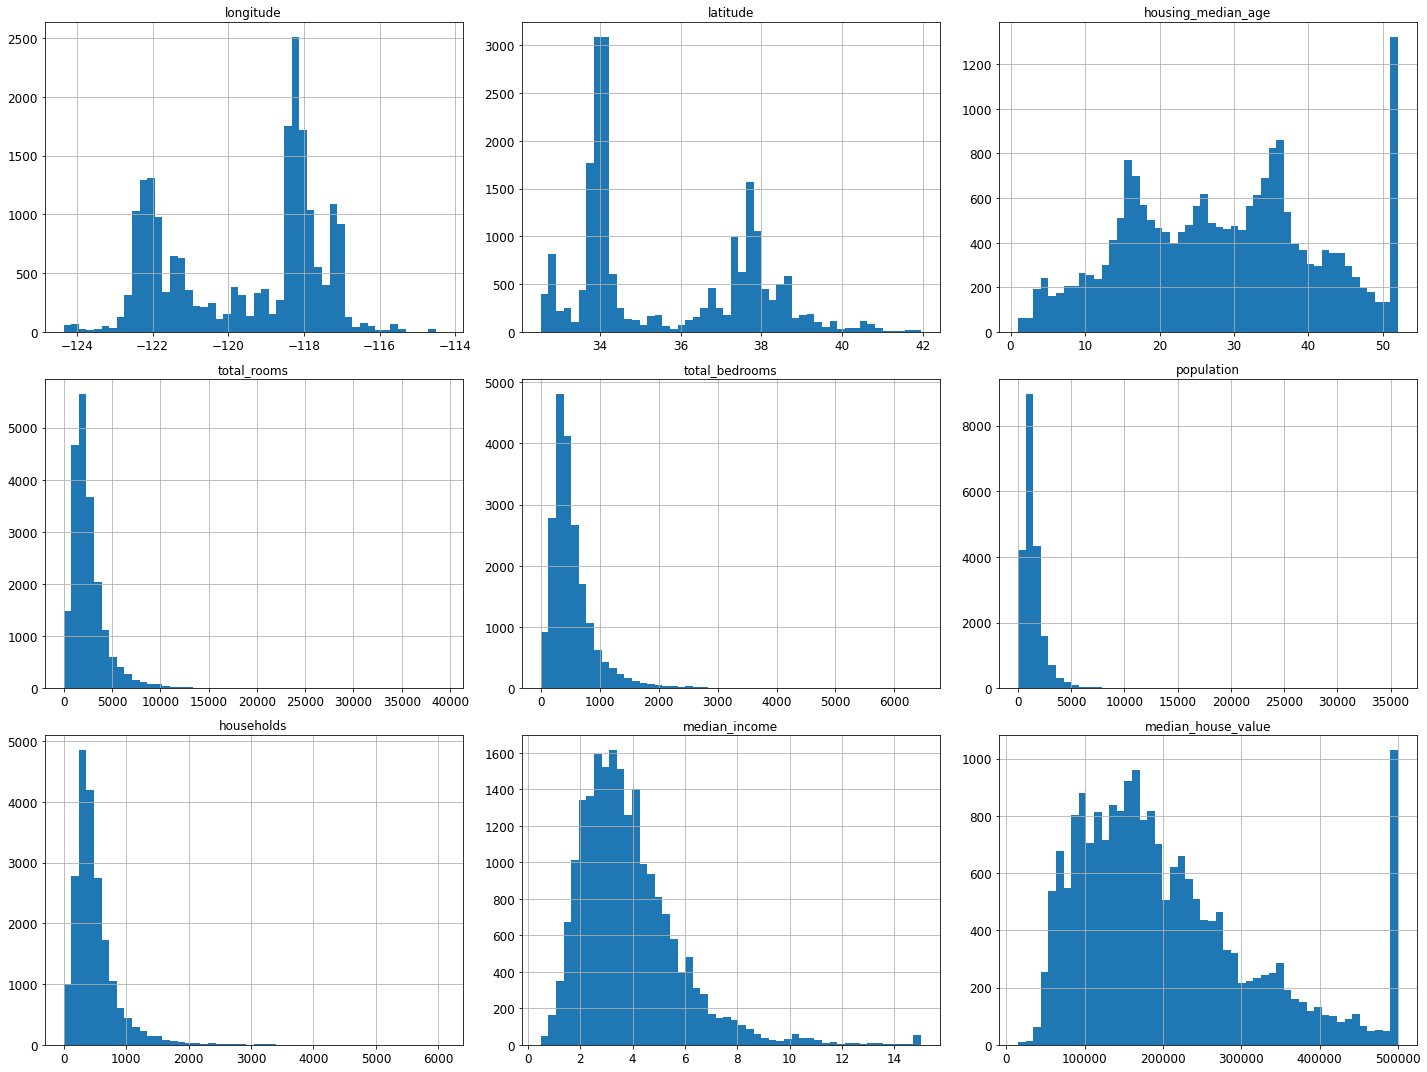

In [15]:
housing.hist(bins=50,figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [16]:
def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [17]:
train_data,test_data=split_train_test(housing,0.2)

In [18]:
print(len(train_data))
print(len(test_data))

16512
4128


In [19]:
#advanced splitting
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [20]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [21]:
housing_with_id = housing.reset_index()  
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [22]:
train_set.head()

index  longitude  latitude  housing_median_age  total_rooms  \
0      0    -122.23     37.88                41.0        880.0   
1      1    -122.22     37.86                21.0       7099.0   
2      2    -122.24     37.85                52.0       1467.0   
3      3    -122.25     37.85                52.0       1274.0   
6      6    -122.25     37.84                52.0       2535.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           129.0       322.0       126.0         8.3252            452600.0   
1          1106.0      2401.0      1138.0         8.3014            358500.0   
2           190.0       496.0       177.0         7.2574            352100.0   
3           235.0       558.0       219.0         5.6431            341300.0   
6           489.0      1094.0       514.0         3.6591            299200.0   

  ocean_proximity  
0        NEAR BAY  
1        NEAR BAY  
2        NEAR BAY  
3        NEAR BAY  
6        NEAR BAY

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_data,test_data=train_test_split(housing,test_size=0.2)

In [25]:
train_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19280    -122.72     38.42                26.0       3604.0           734.0   
7931     -118.06     33.84                26.0       6960.0          1454.0   
12047    -117.53     33.88                22.0       2855.0           667.0   
7984     -118.18     33.87                38.0       2664.0           626.0   
2320     -119.70     36.81                32.0       2623.0           528.0   

       population  households  median_income  median_house_value  \
19280      2605.0       704.0         3.0969            143800.0   
7931       4367.0      1437.0         4.7953            210900.0   
12047      2453.0       624.0         3.1312             91000.0   
7984       1627.0       604.0         3.7527            161900.0   
2320       1570.0       492.0         2.7159             68000.0   

      ocean_proximity  
19280       <1H OCEAN  
7931        <1H OCEAN  
12047          INLAND  
7984        <1H OCEAN  
2320           INLAND

<AxesSubplot:>

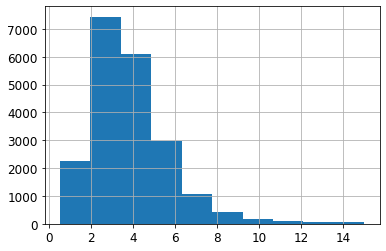

In [26]:
housing['median_income'].hist()

In [27]:
# to make the unbaised model,reducing the cats of median income
housing["income_cat"]=pd.cut(housing['median_income'],
                             bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                             labels=[1,2,3,4,5])

In [28]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

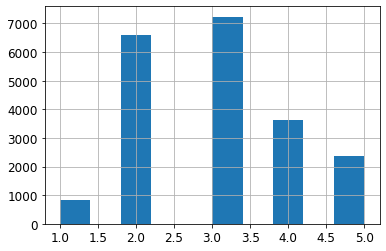

In [29]:
housing['income_cat'].hist()

In [30]:
from sklearn.model_selection import StratifiedShuffleSplit

In [31]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=25)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [32]:
#sampling the data with unbiased
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [33]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [34]:
strat_train_set["income_cat"].value_counts()/len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [35]:
train_data,test_data=train_test_split(housing,test_size=0.2)

In [36]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

In [37]:
compare_props = pd.DataFrame({
                               "Overall": income_cat_proportions(housing),
                               "Stratified": income_cat_proportions(strat_test_set),
                               "Random": income_cat_proportions(test_data),
                            }).sort_index()

In [38]:
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [39]:
compare_props.head()

Overall  Stratified    Random  Rand. %error  Strat. %error
1  0.039826    0.039729  0.038760     -2.676399      -0.243309
2  0.318847    0.318798  0.329215      3.251785      -0.015195
3  0.350581    0.350533  0.345930     -1.326700      -0.013820
4  0.176308    0.176357  0.170058     -3.544930       0.027480
5  0.114438    0.114583  0.116037      1.397121       0.127011

In [40]:
#let's remove the income cat
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [41]:
strat_train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5027     -118.34     33.99                46.0       1217.0           322.0   
5580     -118.30     33.83                33.0       2716.0           660.0   
424      -122.26     37.88                52.0       2255.0           410.0   
19794    -123.41     40.61                17.0        769.0           205.0   
15061    -116.95     32.79                19.0      11391.0          3093.0   

       population  households  median_income  median_house_value  \
5027        662.0       305.0         3.1731            140300.0   
5580       1807.0       661.0         3.5473            226300.0   
424         823.0       377.0         5.7979            415300.0   
19794       301.0       126.0         1.7875             55000.0   
15061      7178.0      2905.0         2.0326            123200.0   

      ocean_proximity  
5027        <1H OCEAN  
5580        <1H OCEAN  
424          NEAR BAY  
19794          INLAND  
15061       <1H OCEAN

# Visualize the data to get insights

In [42]:
housing=strat_train_set.copy()

Saving figure..  Doesn't look pretty good right


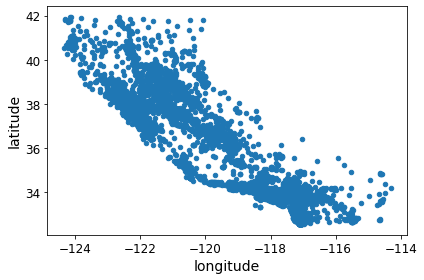

In [43]:
housing.plot(kind="scatter",x="longitude",y="latitude")
save_fig("Doesn't look pretty good right")

Saving figure..  Looks a bit better than before


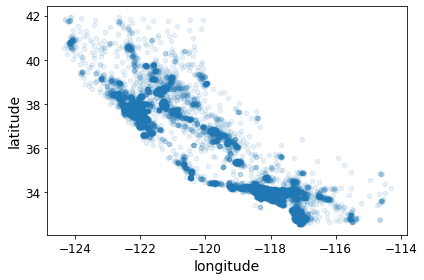

In [44]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)
save_fig("Looks a bit better than before")

Saving figure..  Lokking great scatterplot


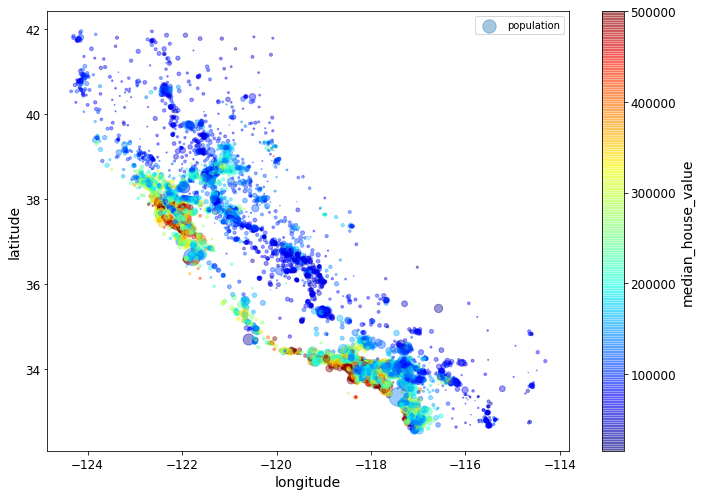

In [45]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing['population']/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
plt.legend()
save_fig("Lokking great scatterplot")

In [46]:
images_path = os.path.join(project_root_dir, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
dowload_root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
filename = "california.png"
print("Downloading", filename)
url = dowload_root + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7f06ca913210>)

/home/srikar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


Saving figure..  Calfornia_House_Pricing_Plot


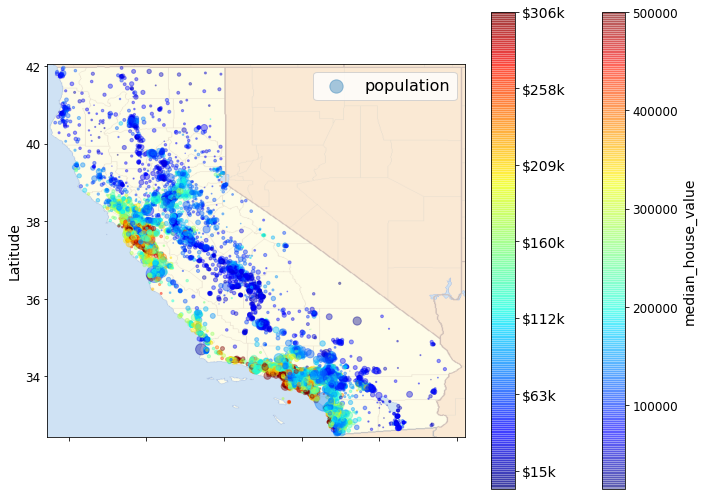

In [47]:
import matplotlib.image as mpimg
california_img=mpimg.imread(project_root_dir+"/images/end_to_end_project/california.png")
ax=housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=housing['population']/100,label="population",figsize=(10,7),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.imshow(california_img,extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.xlabel("Longitude",fontsize=14)
plt.ylabel("Latitude",fontsize=14)
prices=housing["median_house_value"]
tick_values=np.linspace(prices.min(),prices.max(),11)
cbar=plt.colorbar()
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
plt.legend(fontsize=16)
save_fig("Calfornia_House_Pricing_Plot")
plt.show()

In [48]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688405
total_rooms           0.135435
housing_median_age    0.107475
households            0.068141
total_bedrooms        0.052004
population           -0.021311
longitude            -0.038706
latitude             -0.150856
Name: median_house_value, dtype: float64

In [49]:
corr_matrix.head()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924759           -0.110769     0.043109   
latitude            -0.924759  1.000000            0.013027    -0.034906   
housing_median_age  -0.110769  0.013027            1.000000    -0.360646   
total_rooms          0.043109 -0.034906           -0.360646     1.000000   
total_bedrooms       0.064207 -0.061849           -0.322904     0.932383   

                    total_bedrooms  population  households  median_income  \
longitude                 0.064207    0.095421    0.050737      -0.008609   
latitude                 -0.061849   -0.104769   -0.066653      -0.085456   
housing_median_age       -0.322904   -0.295685   -0.304923      -0.117055   
total_rooms               0.932383    0.858526    0.920177       0.200436   
total_bedrooms            1.000000    0.877103    0.979921      -0.001425   

                    median_house_value  
longitude                    -0.038706  
latitude                     -0.150856  
housing_median_age            0.107475  
total_rooms                   0.135435  
total_bedrooms                0.052004

In [50]:
from pandas.plotting import scatter_matrix

Saving figure..  Scatter_matrix_plot


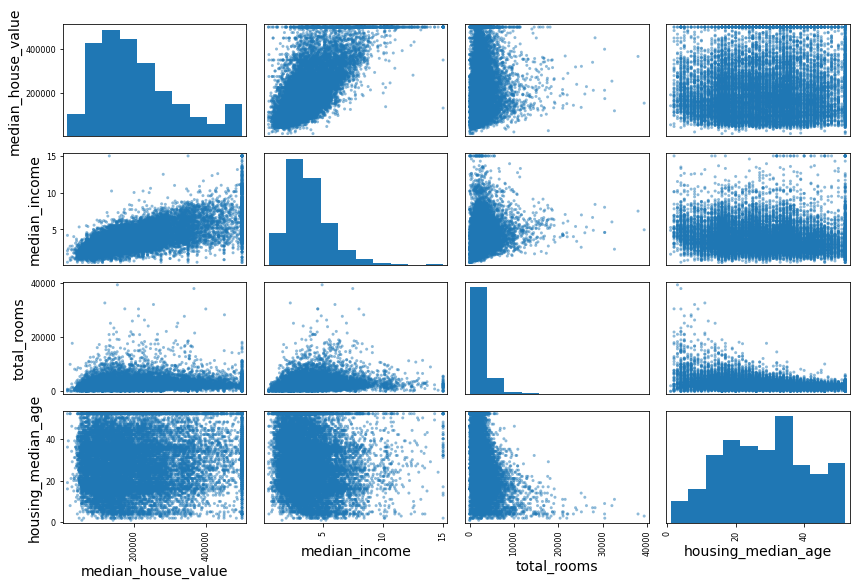

In [51]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))
save_fig("Scatter_matrix_plot")

Saving figure..  Median Income vs Median House Value


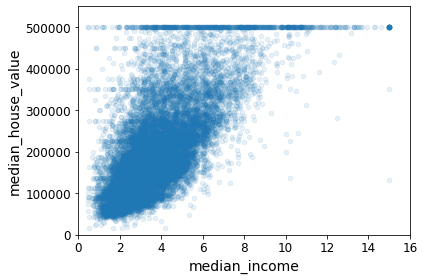

In [52]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.axis([0,16,0,550000])
save_fig("Median Income vs Median House Value")

In [53]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5027     -118.34     33.99                46.0       1217.0           322.0   
5580     -118.30     33.83                33.0       2716.0           660.0   
424      -122.26     37.88                52.0       2255.0           410.0   
19794    -123.41     40.61                17.0        769.0           205.0   
15061    -116.95     32.79                19.0      11391.0          3093.0   

       population  households  median_income  median_house_value  \
5027        662.0       305.0         3.1731            140300.0   
5580       1807.0       661.0         3.5473            226300.0   
424         823.0       377.0         5.7979            415300.0   
19794       301.0       126.0         1.7875             55000.0   
15061      7178.0      2905.0         2.0326            123200.0   

      ocean_proximity  
5027        <1H OCEAN  
5580        <1H OCEAN  
424          NEAR BAY  
19794          INLAND  
15061       <1H OCEAN

In [54]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [55]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5027     -118.34     33.99                46.0       1217.0           322.0   
5580     -118.30     33.83                33.0       2716.0           660.0   
424      -122.26     37.88                52.0       2255.0           410.0   
19794    -123.41     40.61                17.0        769.0           205.0   
15061    -116.95     32.79                19.0      11391.0          3093.0   

       population  households  median_income  median_house_value  \
5027        662.0       305.0         3.1731            140300.0   
5580       1807.0       661.0         3.5473            226300.0   
424         823.0       377.0         5.7979            415300.0   
19794       301.0       126.0         1.7875             55000.0   
15061      7178.0      2905.0         2.0326            123200.0   

      ocean_proximity  rooms_per_household  bedrooms_per_room  \
5027        <1H OCEAN             3.990164           0.264585   
5580        <1H OCEAN             4.108926           0.243004   
424          NEAR BAY             5.981432           0.181818   
19794          INLAND             6.103175           0.266580   
15061       <1H OCEAN             3.921170           0.271530   

       population_per_household  
5027                   2.170492  
5580                   2.733737  
424                    2.183024  
19794                  2.388889  
15061                  2.470912

In [56]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688405
rooms_per_household         0.145808
total_rooms                 0.135435
housing_median_age          0.107475
households                  0.068141
total_bedrooms              0.052004
population                 -0.021311
population_per_household   -0.022354
longitude                  -0.038706
latitude                   -0.150856
bedrooms_per_room          -0.255962
Name: median_house_value, dtype: float64

Saving figure..  Rooms Per Household vs Median House Value


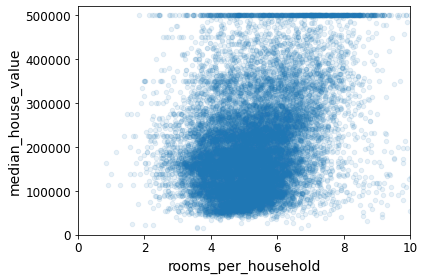

In [57]:
housing.plot(kind="scatter",x="rooms_per_household",y="median_house_value",alpha=0.1)
plt.axis([0,10,0,520000])
save_fig("Rooms Per Household vs Median House Value")

In [58]:
housing.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  16512.000000  16512.000000        16512.000000  16512.000000   
mean    -119.574599     35.638611           28.591994   2654.181020   
std        2.007531      2.139540           12.580946   2230.411756   
min     -124.350000     32.550000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.500000     34.260000           29.000000   2136.000000   
75%     -118.010000     37.720000           37.000000   3163.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    16348.000000  16512.000000  16512.000000   16512.000000   
mean       540.809334   1432.392260    502.160126       3.866730   
std        426.542487   1155.318324    386.520789       1.894050   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    789.000000    280.750000       2.565175   
50%        435.000000   1168.000000    410.000000       3.531300   
75%        649.000000   1725.000000    606.000000       4.739375   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  rooms_per_household  bedrooms_per_room  \
count        16512.000000         16512.000000       16348.000000   
mean        206746.763384             5.434136           0.212751   
std         115320.163205             2.563531           0.057437   
min          14999.000000             0.846154           0.100000   
25%         119575.000000             4.441216           0.175356   
50%         179500.000000             5.233066           0.202826   
75%         264500.000000             6.053147           0.239785   
max         500001.000000           141.909091           1.000000   

       population_per_household  
count              16512.000000  
mean                   3.078306  
std                   11.447558  
min                    0.692308  
25%                    2.427283  
50%                    2.817544  
75%                    3.279435  
max                 1243.333333

In [59]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()

In [60]:
sample_incomplete_rows=housing[housing.isnull().any(axis=1)].head()

In [61]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19122    -122.65     38.25                23.0       4030.0             NaN   
10389    -117.66     33.58                 6.0       4186.0             NaN   
10236    -117.92     33.87                33.0       1597.0             NaN   
16880    -122.39     37.59                32.0       4497.0             NaN   
16038    -122.46     37.72                39.0       2254.0             NaN   

       population  households  median_income ocean_proximity  
19122      1852.0       778.0         3.4020       <1H OCEAN  
10389      1794.0       541.0         9.6986       <1H OCEAN  
10236      1888.0       423.0         3.0550       <1H OCEAN  
16880      1846.0       715.0         6.1323      NEAR OCEAN  
16038      1388.0       404.0         2.9688      NEAR OCEAN

In [62]:
median=housing["total_bedrooms"].median()
median

435.0

In [63]:
sample_incomplete_rows["total_bedrooms"].fillna(median,inplace=True)

In [64]:
sample_incomplete_rows

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19122    -122.65     38.25                23.0       4030.0           435.0   
10389    -117.66     33.58                 6.0       4186.0           435.0   
10236    -117.92     33.87                33.0       1597.0           435.0   
16880    -122.39     37.59                32.0       4497.0           435.0   
16038    -122.46     37.72                39.0       2254.0           435.0   

       population  households  median_income ocean_proximity  
19122      1852.0       778.0         3.4020       <1H OCEAN  
10389      1794.0       541.0         9.6986       <1H OCEAN  
10236      1888.0       423.0         3.0550       <1H OCEAN  
16880      1846.0       715.0         6.1323      NEAR OCEAN  
16038      1388.0       404.0         2.9688      NEAR OCEAN

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [66]:
housing_numeric=housing.drop("ocean_proximity",axis=1)

In [67]:
imputer.fit(housing_numeric)

SimpleImputer(strategy='median')

In [68]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2136.    ,  435.    , 1168.    ,
        410.    ,    3.5313])

In [69]:
X=imputer.transform(housing_numeric)

In [70]:
X

array([[-118.34  ,   33.99  ,   46.    , ...,  662.    ,  305.    ,
           3.1731],
       [-118.3   ,   33.83  ,   33.    , ..., 1807.    ,  661.    ,
           3.5473],
       [-122.26  ,   37.88  ,   52.    , ...,  823.    ,  377.    ,
           5.7979],
       ...,
       [-118.61  ,   34.21  ,   33.    , ..., 1208.    ,  406.    ,
           5.4527],
       [-116.86  ,   33.02  ,   17.    , ...,  251.    ,   69.    ,
           4.6518],
       [-117.39  ,   33.96  ,   49.    , ..., 1344.    ,  451.    ,
           4.0833]])

In [71]:
housing_tr=pd.DataFrame(X,columns=housing_numeric.columns,index=housing_numeric.index)

In [72]:
housing_tr.loc[sample_incomplete_rows.index.values]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
19122    -122.65     38.25                23.0       4030.0           435.0   
10389    -117.66     33.58                 6.0       4186.0           435.0   
10236    -117.92     33.87                33.0       1597.0           435.0   
16880    -122.39     37.59                32.0       4497.0           435.0   
16038    -122.46     37.72                39.0       2254.0           435.0   

       population  households  median_income  
19122      1852.0       778.0         3.4020  
10389      1794.0       541.0         9.6986  
10236      1888.0       423.0         3.0550  
16880      1846.0       715.0         6.1323  
16038      1388.0       404.0         2.9688

In [73]:
housing_cat=housing[["ocean_proximity"]]

In [74]:
housing_cat.head()

ocean_proximity
5027        <1H OCEAN
5580        <1H OCEAN
424          NEAR BAY
19794          INLAND
15061       <1H OCEAN

In [75]:
housing_cat.value_counts()

ocean_proximity
<1H OCEAN          7301
INLAND             5267
NEAR OCEAN         2123
NEAR BAY           1816
ISLAND                5
dtype: int64

In [76]:
from sklearn.preprocessing import OrdinalEncoder

In [77]:
ordinal_encoder=OrdinalEncoder()
housing_cat_ord_enc=ordinal_encoder.fit_transform(housing_cat)
housing_cat_ord_enc[:10]

array([[0.],
       [0.],
       [3.],
       [1.],
       [0.],
       [4.],
       [0.],
       [4.],
       [0.],
       [1.]])

In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [79]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
encoder=OneHotEncoder()

In [81]:
housing_cat_onehot_enc=encoder.fit_transform(housing_cat)
housing_cat_onehot_enc[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [82]:
housing_cat_onehot_enc.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [83]:
encoder=OneHotEncoder(sparse=False)
housing_cat_onehot_enc=encoder.fit_transform(housing_cat)
housing_cat_onehot_enc[:10]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [84]:
from sklearn.base import BaseEstimator,TransformerMixin

In [85]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5027     -118.34     33.99                46.0       1217.0           322.0   
5580     -118.30     33.83                33.0       2716.0           660.0   
424      -122.26     37.88                52.0       2255.0           410.0   
19794    -123.41     40.61                17.0        769.0           205.0   
15061    -116.95     32.79                19.0      11391.0          3093.0   

       population  households  median_income ocean_proximity  
5027        662.0       305.0         3.1731       <1H OCEAN  
5580       1807.0       661.0         3.5473       <1H OCEAN  
424         823.0       377.0         5.7979        NEAR BAY  
19794       301.0       126.0         1.7875          INLAND  
15061      7178.0      2905.0         2.0326       <1H OCEAN

In [86]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [87]:
class CombinedAttributeAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [88]:
att_adder=CombinedAttributeAdder(add_bedrooms_per_room=False)

In [89]:
housing_extra_attrib=att_adder.transform(housing.values)

In [90]:
#other way to get dynamically
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix=[housing.columns.get_loc(c) for c in col_names]

In [91]:
housing_extra_attrib=pd.DataFrame(housing_extra_attrib,
                                 columns=list(housing.columns)+["rooms_per_household", 
                                                                "population_per_household"],
                                 index=housing.index)

In [92]:
housing_extra_attrib.head()

longitude latitude housing_median_age total_rooms total_bedrooms  \
5027    -118.34    33.99               46.0      1217.0          322.0   
5580     -118.3    33.83               33.0      2716.0          660.0   
424     -122.26    37.88               52.0      2255.0          410.0   
19794   -123.41    40.61               17.0       769.0          205.0   
15061   -116.95    32.79               19.0     11391.0         3093.0   

      population households median_income ocean_proximity rooms_per_household  \
5027       662.0      305.0        3.1731       <1H OCEAN            3.990164   
5580      1807.0      661.0        3.5473       <1H OCEAN            4.108926   
424        823.0      377.0        5.7979        NEAR BAY            5.981432   
19794      301.0      126.0        1.7875          INLAND            6.103175   
15061     7178.0     2905.0        2.0326       <1H OCEAN             3.92117   

      population_per_household  
5027                  2.170492  
5580                  2.733737  
424                   2.183024  
19794                 2.388889  
15061                 2.470912

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [94]:
num_pipeline=Pipeline([("imputer",SimpleImputer(strategy="median")),
                       ("attrib_adder",CombinedAttributeAdder()),
                       ("std_scalar",StandardScaler())])

In [95]:
housing_num_tr=num_pipeline.fit_transform(housing_numeric)

In [96]:
housing_num_tr

array([[ 0.6150024 , -0.77056817,  1.38372218, ..., -0.56329183,
        -0.07930441,  0.78276229],
       [ 0.63492798, -0.84535287,  0.35038223, ..., -0.51696294,
        -0.03010073,  0.45188159],
       [-1.33770391,  1.04763492,  1.86064831, ...,  0.2134996 ,
        -0.07820964, -0.48624428],
       ...,
       [ 0.48050477, -0.6677392 ,  0.35038223, ...,  0.38696718,
        -0.0089923 , -0.74107923],
       [ 1.35224866, -1.22395043, -0.92142078, ...,  0.14724594,
         0.04886561, -0.67394419],
       [ 1.0882348 , -0.7845903 ,  1.62218524, ...,  0.06591424,
        -0.00858391, -0.4768674 ]])

In [97]:
from sklearn.compose import ColumnTransformer

In [98]:
num_attribs = list(housing_numeric)
cat_attribs = ["ocean_proximity"]

In [99]:
full_pipeline=ColumnTransformer([("num",num_pipeline,num_attribs),
                                 ("cat",OneHotEncoder(),cat_attribs)])

In [100]:
housing_prepared=full_pipeline.fit_transform(housing)

In [101]:
housing_prepared

array([[ 0.6150024 , -0.77056817,  1.38372218, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63492798, -0.84535287,  0.35038223, ...,  0.        ,
         0.        ,  0.        ],
       [-1.33770391,  1.04763492,  1.86064831, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.48050477, -0.6677392 ,  0.35038223, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.35224866, -1.22395043, -0.92142078, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.0882348 , -0.7845903 ,  1.62218524, ...,  0.        ,
         0.        ,  0.        ]])

In [102]:
housing_prepared.shape

(16512, 16)

In [103]:
from sklearn.linear_model import LinearRegression

In [104]:
linear_reg = LinearRegression()
linear_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [105]:
sample_data=housing.iloc[:5]
sample_labels=housing_labels[:5]
sample_data_preprocessed=full_pipeline.transform(sample_data)

In [106]:
print("predictions: ",linear_reg.predict(sample_data_preprocessed))

predictions:  [228067.14895663 230334.52925959 333636.84702229  66628.72246814
 234570.27868786]


In [107]:
print("Labels:", list(sample_labels))

Labels: [140300.0, 226300.0, 415300.0, 55000.0, 123200.0]


In [108]:
from sklearn.metrics import mean_squared_error
housing_predictions = linear_reg.predict(housing_prepared)
linear_mse = mean_squared_error(housing_labels, housing_predictions)
linear_rmse = np.sqrt(linear_mse)
linear_rmse

68265.50261941586

In [109]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49348.15863299686

In [110]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [111]:
print("predictions: ",tree_reg.predict(sample_data_preprocessed))

predictions:  [140300. 226300. 415300.  55000. 123200.]


In [112]:
print("Labels:", list(sample_labels))

Labels: [140300.0, 226300.0, 415300.0, 55000.0, 123200.0]


In [113]:
# :| looks quite different!
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [114]:
housing_predictions = tree_reg.predict(sample_data_preprocessed)
tree_mse = mean_squared_error(sample_labels,housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [115]:
from sklearn.model_selection import cross_val_score

In [116]:
scores=cross_val_score(linear_reg,housing_prepared,housing_labels,
                       scoring="neg_mean_squared_error", cv=10)

In [117]:
linear_rmse_cross=np.sqrt(-scores)
linear_rmse_cross

array([66448.90840165, 72833.79568298, 70717.20786533, 67741.83189578,
       67973.85405831, 65040.47384219, 66542.23100572, 66922.57292698,
       71126.19934782, 71454.08629125])

In [118]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [119]:
display_scores(linear_rmse_cross)

Scores: [66448.90840165 72833.79568298 70717.20786533 67741.83189578
 67973.85405831 65040.47384219 66542.23100572 66922.57292698
 71126.19934782 71454.08629125]
Mean: 68680.1161317999
Standard deviation: 2496.898243311239


In [120]:
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,
                       scoring="neg_mean_squared_error", cv=10)

In [121]:
tree_rmse_cross=np.sqrt(-scores)
tree_rmse_cross

array([71438.45489267, 71382.49350831, 69117.96328472, 69121.730768  ,
       70674.64266776, 68398.4983438 , 70802.47881581, 69162.85779439,
       71555.63087751, 67966.95465403])

In [122]:
display_scores(tree_rmse_cross)

Scores: [71438.45489267 71382.49350831 69117.96328472 69121.730768
 70674.64266776 68398.4983438  70802.47881581 69162.85779439
 71555.63087751 67966.95465403]
Mean: 69962.17056069971
Standard deviation: 1281.9308147091672


In [123]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=10, random_state=42)

In [124]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

21916.7607761295

In [125]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51993.77289123 54052.94748398 54980.54945282 50826.17571307
 53881.93963808 50238.54832831 52611.11813596 49350.76139983
 53899.82935633 53556.65680894]
Mean: 52539.22992085569
Standard deviation: 1778.689205694243


In [126]:
from sklearn.svm import SVR

In [127]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions = svm_reg.predict(housing_prepared)
svm_mse = mean_squared_error(housing_labels, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

110583.94688446635

In [128]:
svm_scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)
display_scores(svm_rmse_scores)

Scores: [109443.76278027 114014.94015471 114894.1994423  110264.29390324
 110126.07365069 110358.15616192 109543.19135103 111002.89576494
 113360.89409699 109956.46244157]
Mean: 111296.48697476598
Standard deviation: 1905.2440287381112


In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
param_grid=[{"n_estimators":[3,10,30],"max_features":[2,4,6,8]},
            {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}]

In [131]:
forest_reg=RandomForestRegressor(random_state=42)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,
                         scoring='neg_mean_squared_error', 
                         return_train_score=True)

In [132]:
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [133]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [134]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [135]:
cvres=grid_search.cv_results_

In [136]:
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

63769.73739788567 {'max_features': 2, 'n_estimators': 3}
55064.377608881856 {'max_features': 2, 'n_estimators': 10}
53150.7285385437 {'max_features': 2, 'n_estimators': 30}
60550.90965934291 {'max_features': 4, 'n_estimators': 3}
52482.269220829075 {'max_features': 4, 'n_estimators': 10}
50360.281306125755 {'max_features': 4, 'n_estimators': 30}
58297.067810521556 {'max_features': 6, 'n_estimators': 3}
51925.66589413296 {'max_features': 6, 'n_estimators': 10}
50403.130929829305 {'max_features': 6, 'n_estimators': 30}
59402.70617732044 {'max_features': 8, 'n_estimators': 3}
52378.752013568446 {'max_features': 8, 'n_estimators': 10}
49884.80500498448 {'max_features': 8, 'n_estimators': 30}
62031.57622871472 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54057.678866287184 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59264.875339450016 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52592.90300072502 {'bootstrap': False, 'max_features': 3, 'n_estimato

In [137]:
pd.DataFrame(grid_search.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.081128      0.027754         0.003824        0.000106   
1        0.220844      0.007103         0.010579        0.000207   
2        0.627649      0.007199         0.030316        0.000317   
3        0.106371      0.002515         0.003622        0.000037   
4        0.341798      0.004663         0.010251        0.000061   
5        1.014506      0.006985         0.030037        0.000095   
6        0.146640      0.002158         0.003641        0.000038   
7        0.477588      0.005182         0.010196        0.000038   
8        1.424187      0.009887         0.030163        0.000491   
9        0.186474      0.002272         0.003629        0.000038   
10       0.622167      0.002600         0.010305        0.000023   
11       1.859580      0.010113         0.030346        0.000167   
12       0.104235      0.001808         0.004288        0.000072   
13       0.336388      0.004536         0.012225        0.000090   
14       0.134901      0.000890         0.004208        0.000078   
15       0.443133      0.003463         0.012194        0.000113   
16       0.173379      0.000912         0.004305        0.000078   
17       0.558487      0.003726         0.012051        0.000101   

   param_max_features param_n_estimators param_bootstrap  \
0                   2                  3             NaN   
1                   2                 10             NaN   
2                   2                 30             NaN   
3                   4                  3             NaN   
4                   4                 10             NaN   
5                   4                 30             NaN   
6                   6                  3             NaN   
7                   6                 10             NaN   
8                   6                 30             NaN   
9                   8                  3             NaN   
10                  8                 10             NaN   
11                  8                 30             NaN   
12                  2                  3           False   
13                  2                 10           False   
14                  3                  3           False   
15                  3                 10           False   
16                  4                  3           False   
17                  4                 10           False   

                                               params  split0_test_score  \
0              {'max_features': 2, 'n_estimators': 3}      -4.306421e+09   
1             {'max_features': 2, 'n_estimators': 10}      -3.137538e+09   
2             {'max_features': 2, 'n_estimators': 30}      -2.930261e+09   
3              {'max_features': 4, 'n_estimators': 3}      -3.780895e+09   
4             {'max_features': 4, 'n_estimators': 10}      -2.849447e+09   
5             {'max_features': 4, 'n_estimators': 30}      -2.636924e+09   
6              {'max_features': 6, 'n_estimators': 3}      -3.386765e+09   
7             {'max_features': 6, 'n_estimators': 10}      -2.662835e+09   
8             {'max_features': 6, 'n_estimators': 30}      -2.596844e+09   
9              {'max_features': 8, 'n_estimators': 3}      -3.614172e+09   
10            {'max_features': 8, 'n_estimators': 10}      -2.786949e+09   
11            {'max_features': 8, 'n_estimators': 30}      -2.531816e+09   
12  {'bootstrap': False, 'max_features': 2, 'n_est...      -3.841822e+09   
13  {'bootstrap': False, 'max_features': 2, 'n_est...      -3.084924e+09   
14  {'bootstrap': False, 'max_features': 3, 'n_est...      -3.538221e+09   
15  {'bootstrap': False, 'max_features': 3, 'n_est...      -2.785401e+09   
16  {'bootstrap': False, 'max_features': 4, 'n_est...      -3.499048e+09   
17  {'bootstrap': False, 'max_features': 4, 'n_est...      -2.707967e+09   

    split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0       -4.117138e+09  ...    -4.066579e+09  

In [138]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [139]:
param_distribs={"n_estimators": randint(low=1,high=200),
                "max_features": randint(low=1,high=8)}

In [140]:
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06ca8a1550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f06ca8a1690>},
                   random_state=42, scoring='neg_mean_squared_error')

In [141]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49182.35030698369 {'max_features': 7, 'n_estimators': 180}
51858.00721955411 {'max_features': 5, 'n_estimators': 15}
50573.589103469334 {'max_features': 3, 'n_estimators': 72}
50953.235108132205 {'max_features': 5, 'n_estimators': 21}
49376.19551814536 {'max_features': 7, 'n_estimators': 122}
50559.31672695552 {'max_features': 3, 'n_estimators': 75}
50447.73104051944 {'max_features': 3, 'n_estimators': 88}
49615.364823212374 {'max_features': 5, 'n_estimators': 100}
50332.31616301067 {'max_features': 3, 'n_estimators': 150}
64793.116157941935 {'max_features': 5, 'n_estimators': 2}


In [142]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.24917187e-02, 6.79783697e-02, 3.97307460e-02, 1.58386093e-02,
       1.41830196e-02, 1.57089800e-02, 1.36661027e-02, 3.70444233e-01,
       5.57580313e-02, 1.08012088e-01, 5.15633470e-02, 6.79921876e-03,
       1.61359211e-01, 2.49914823e-04, 2.91264384e-03, 3.30376611e-03])

In [143]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([7.29031871e-02, 6.61151901e-02, 4.05401350e-02, 1.66378379e-02,
       1.52904696e-02, 1.59924835e-02, 1.47432473e-02, 3.46671708e-01,
       5.65112841e-02, 1.07468579e-01, 6.91165757e-02, 9.83643388e-03,
       1.60941796e-01, 2.79544683e-04, 2.70253846e-03, 4.24898997e-03])

In [144]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

In [145]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder

OneHotEncoder()

In [146]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [147]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [148]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [149]:
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [150]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.34667170765913374, 'median_income'),
 (0.16094179625545701, 'INLAND'),
 (0.10746857880763412, 'pop_per_hhold'),
 (0.0729031871352842, 'longitude'),
 (0.0691165756731614, 'bedrooms_per_room'),
 (0.06611519011140943, 'latitude'),
 (0.056511284087347236, 'rooms_per_hhold'),
 (0.040540134997883184, 'housing_median_age'),
 (0.01663783786218851, 'total_rooms'),
 (0.015992483481521304, 'population'),
 (0.01529046960525236, 'total_bedrooms'),
 (0.014743247336402128, 'households'),
 (0.009836433876245176, '<1H OCEAN'),
 (0.004248989969086372, 'NEAR OCEAN'),
 (0.002702538459407086, 'NEAR BAY'),
 (0.00027954468258683314, 'ISLAND')]

In [151]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [152]:
final_rmse

48452.965300856275